<a href="https://colab.research.google.com/github/LoPA607/IE643/blob/main/densenet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries-**

In [1]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import warnings
warnings.filterwarnings('ignore')

## Downloading the data-

In [2]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),transforms.Resize((128,128))]))
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),transforms.Resize((128,128))]))

100%|██████████| 170M/170M [00:05<00:00, 29.2MB/s]


## The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [3]:
print(len(cifar_trainset))
print(len(cifar_testset))

50000
10000


In [4]:
classes = cifar_trainset.classes
print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

Number of Classes: 10
Class Names :
 ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
#shape of the image tensor
img, label = cifar_trainset[64]
img_shape = img.shape
img_shape

torch.Size([3, 128, 128])

In [6]:
print("Max & Min Pixel Values:", "Max:", torch.max(img), "Min:", torch.min(img))
print("Pixel Values for all Channels:\n", img[:, :, :])

Max & Min Pixel Values: Max: tensor(2.3530) Min: tensor(-2.1405)
Pixel Values for all Channels:
 tensor([[[-1.1690, -1.1690, -1.1642,  ..., -0.4373, -0.4518, -0.4518],
         [-1.1690, -1.1690, -1.1642,  ..., -0.4373, -0.4518, -0.4518],
         [-1.1690, -1.1690, -1.1648,  ..., -0.3694, -0.3791, -0.3791],
         ...,
         [-0.5996, -0.5996, -0.5836,  ..., -0.8110, -0.7983, -0.7983],
         [-0.5875, -0.5875, -0.5705,  ..., -0.8128, -0.8007, -0.8007],
         [-0.5875, -0.5875, -0.5705,  ..., -0.8128, -0.8007, -0.8007]],

        [[-1.8479, -1.8479, -1.8405,  ..., -0.8105, -0.8252, -0.8252],
         [-1.8479, -1.8479, -1.8405,  ..., -0.8105, -0.8252, -0.8252],
         [-1.8479, -1.8479, -1.8412,  ..., -0.7536, -0.7638, -0.7638],
         ...,
         [-0.7785, -0.7785, -0.7644,  ..., -0.8855, -0.8646, -0.8646],
         [-0.7662, -0.7662, -0.7515,  ..., -0.9039, -0.8842, -0.8842],
         [-0.7662, -0.7662, -0.7515,  ..., -0.9039, -0.8842, -0.8842]],

        [[-1.6556, 

## Splitting the data into test, train and validation dataset-

In [7]:
cifar_trainset, cifar_valset = torch.utils.data.random_split(cifar_trainset, [int(0.8 * len(cifar_trainset)), int(0.2 * len(cifar_trainset))])

In [8]:
print("no of samples in train data",len(cifar_trainset))
print("no of samples in validation data",len(cifar_valset))
print("no of samples in test data",len(cifar_testset))

no of samples in train data 40000
no of samples in validation data 10000
no of samples in test data 10000


**Shuffling and creating batches of data-**

In [9]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(cifar_valset, batch_size=256, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256, shuffle=False)

In [10]:
print("No. of batches in Training dataset : ", len(train_dataloader))
print("No. of batches in Validation dataset : ", len(val_dataloader))
print("No. of batches in Testing dataset : ", len(test_dataloader))

No. of batches in Training dataset :  157
No. of batches in Validation dataset :  40
No. of batches in Testing dataset :  40


**Visualising the data-**

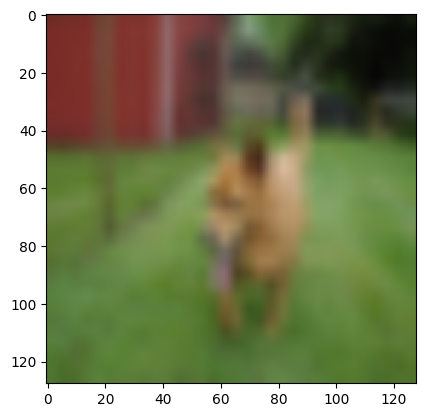

Label as Number: 5
Label as Name: dog


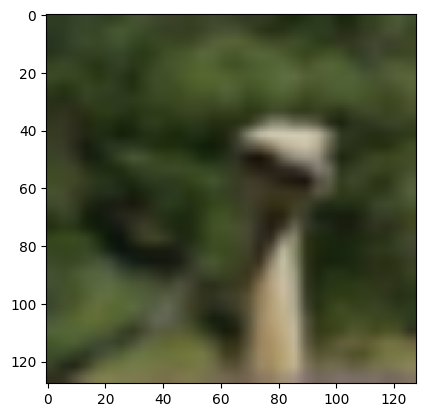

Label as Number: 2
Label as Name: bird


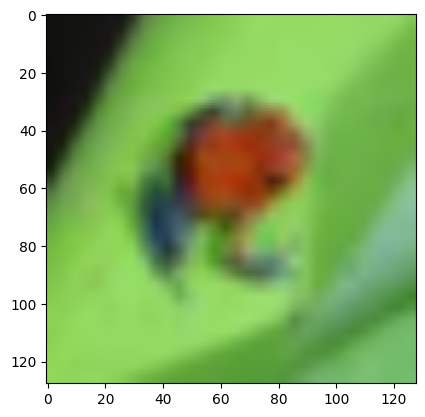

Label as Number: 6
Label as Name: frog


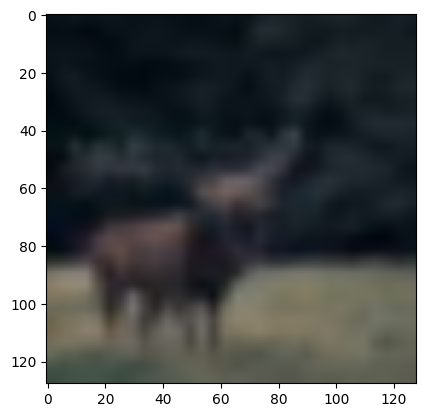

Label as Number: 4
Label as Name: deer


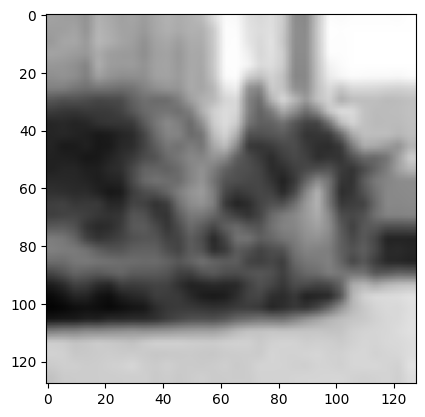

Label as Number: 3
Label as Name: cat


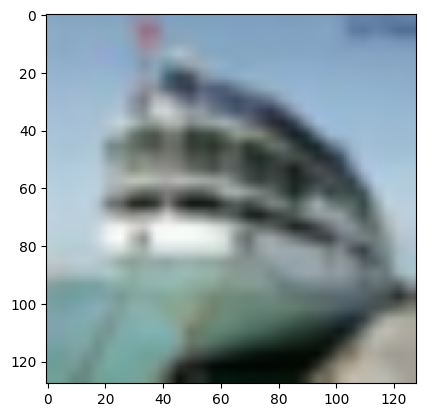

Label as Number: 8
Label as Name: ship


In [11]:
# transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
# previously we normalized the image during data downloading, so here we are converting the image to its actual value by denormalization
for i in range(6):
  img, label = cifar_trainset[ i +64]
  img[0] = img[0] * 0.2023 + 0.4914
  img[1] = img[1] * 0.1994 + 0.4822
  img[2] = img[2] * 0.2010 + 0.4465
  plt.imshow(img.permute((1,2,0)))
  plt.show()
  print('Label as Number:', label)
  print('Label as Name:', classes[label])

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([256, 3, 128, 128])


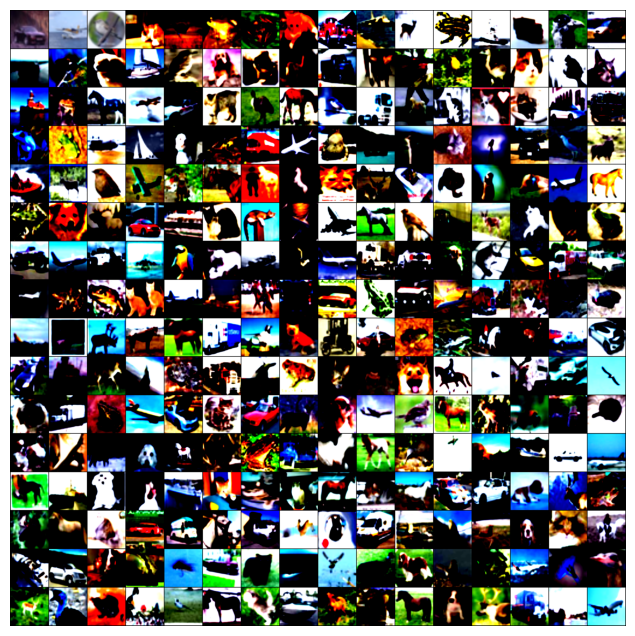

In [12]:
#Displaying the images in train loader
for images, _ in train_dataloader:
    images[0] = images[0] * 0.2023 + 0.4914
    images[1] = images[1] * 0.1994 + 0.4822
    images[2] = images[2] * 0.2010 + 0.4465
    print('Shape of an Image (Batch Size, RGB, Pixels):', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0))) # we need permute here because matplotlib wants to have the channels as the last dimension
    break

## Densely Connected Convolutional Network

https://arxiv.org/pdf/1608.06993

In [14]:
from PIL import Image

img_1 = Image.open('/kaggle/input/dense-net-demo/image_1.png')
img_2 = Image.open('/kaggle/input/dense-net-demo/image_2.png')
img_3 = Image.open('/kaggle/input/dense-net-demo/image_3.png')

# img_1 = img_1.resize((800, 500))
# img_2 = img_2.resize((900, 600))
#img_3 = img_3.resize((500, 800))

print("DenseNet Architecture : A 5-layer dense block with a growth rate of k = 4. Each layer takes all preceding feature-maps as input.")
display(img_1)

print("\n\n\nA deep DenseNet with three dense blocks. The layers between two adjacent blocks are referred to as transition layers and change feature-map sizes via convolution and pooling.")
display(img_2)

print("\n\n\nDenseNet architectures for ImageNet. The growth rate for all the networks is k = 32.")
display(img_3)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dense-net-demo/image_1.png'

In [ ]:
from PIL import Image

# Update these paths to the actual location of your image files
img_1 = Image.open('/path/to/your/image_1.png')
img_2 = Image.open('/path/to/your/image_2.png')
img_3 = Image.open('/path/to/your/image_3.png')

# img_1 = img_1.resize((800, 500))
# img_2 = img_2.resize((900, 600))
#img_3 = img_3.resize((500, 800))

print("DenseNet Architecture : A 5-layer dense block with a growth rate of k = 4. Each layer takes all preceding feature-maps as input.")
display(img_1)

print("\n\n\nA deep DenseNet with three dense blocks. The layers between two adjacent blocks are referred to as transition layers and change feature-map sizes via convolution and pooling.")
display(img_2)

print("\n\n\nDenseNet architectures for ImageNet. The growth rate for all the networks is k = 32.")
display(img_3)

source of fig : https://arxiv.org/pdf/1608.06993

## Note that each “conv” layer shown in the table corresponds the sequence BN-ReLU-Conv

## Adjustments to  Architecture Based on Input Image Resizing
- Image Resizing Assumption: The input image was resized from 256X256 to 128X128 to reduce the computational resources required for training. This downsizing lowers memory usage and speeds up the training process.
- Using 4x4 Instead of 7X7 for Pooling: Since the resized image leads to smaller feature maps, using a pooling kernel size of 4 instead of 7 ensures appropriate dimensionality reduction at the final layer. This adjustment aligns with the smaller input size, maintaining the model's performance.

In [16]:
# DenseNet-121 architecture
class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(Bottleneck, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        out = torch.cat([x, out], 1)  # Concatenate input and output (Dense connection)
        return out

class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(F.relu(self.bn(x)))
        out = self.pool(out)
        return out

class DenseNet(nn.Module):
    def __init__(self, growth_rate=32, num_classes=10):
        super(DenseNet, self).__init__()
        num_channels = 2 * growth_rate  # Initial number of channels

        # Initial convolution layer
        self.conv1 = nn.Conv2d(3, num_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Creating the DenseNet architecture
        self.dense_block1 = self._make_dense_block(num_channels, growth_rate, num_layers=6)  #creates single dense block
        num_channels += 6 * growth_rate #output of bottle neck is growth rate (and 6 output) after bottleneck these many extra channles will be there
        self.trans1 = self._make_transition(num_channels, num_channels // 2)  #
        num_channels = num_channels // 2 #size of feature map will become half

        self.dense_block2 = self._make_dense_block(num_channels, growth_rate, num_layers=12)
        num_channels += 12 * growth_rate
        self.trans2 = self._make_transition(num_channels, num_channels // 2)
        num_channels = num_channels // 2

        self.dense_block3 = self._make_dense_block(num_channels, growth_rate, num_layers=24)
        num_channels += 24 * growth_rate
        self.trans3 = self._make_transition(num_channels, num_channels // 2)
        num_channels = num_channels // 2

        self.dense_block4 = self._make_dense_block(num_channels, growth_rate, num_layers=16)
        num_channels += 16 * growth_rate

        # Final layers
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.fc = nn.Linear(num_channels, num_classes)

    def _make_dense_block(self, in_channels, growth_rate, num_layers):
        layers = []
        for _ in range(num_layers):
            layers.append(Bottleneck(in_channels, growth_rate))
            in_channels += growth_rate
        return nn.Sequential(*layers)

    def _make_transition(self, in_channels, out_channels):
        return Transition(in_channels, out_channels)

    def forward(self, x):
        out = self.pool1(F.relu(self.bn1(self.conv1(x))))
        out = self.trans1(self.dense_block1(out))
        out = self.trans2(self.dense_block2(out))
        out = self.trans3(self.dense_block3(out))
        out = self.dense_block4(out)
        out = F.avg_pool2d(F.relu(self.bn2(out)), 4)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

In [17]:
# Initializing the DenseNet-121
model = DenseNet(growth_rate=32, num_classes=10)

In [18]:
# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [19]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  #since classification problem
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.001)

## **Training-**

In [ ]:
# Training the model
num_epochs = 30
train_loss, val_loss = [], []
train_acc, val_acc = [], []
best_val_loss = float('inf')
early_stop_count = 0

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss.append(running_train_loss / len(train_dataloader))
    train_acc.append(100 * correct_train / total_train)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss.append(running_val_loss / len(val_dataloader))
    val_acc.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, '
          f'Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.2f}%')

    # Save the best model based on validation loss (early stopping)
    if val_loss[-1] < best_val_loss: #early stopping if model not performing properly
        best_val_loss = val_loss[-1]
        torch.save(model.state_dict(), 'best_densenet121_scratch_model.pth')
        early_stop_count = 0
    else:
        early_stop_count += 1
        if early_stop_count == 5:  # Stop training if validation loss doesn't improve for 5 consecutive epochs
            print("Early stopping triggered!")
            break

# Plot

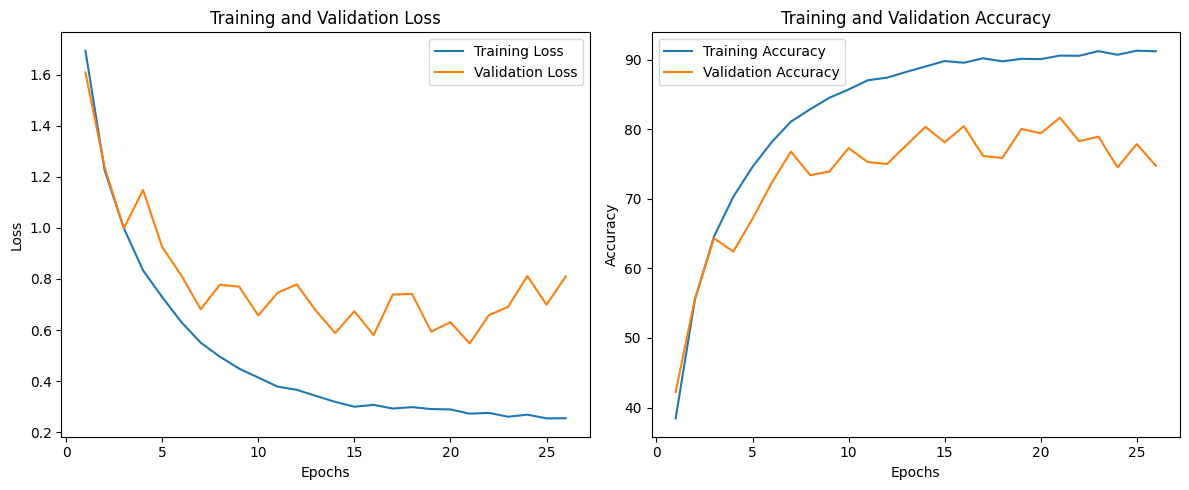

In [ ]:
# Plot training and validation accuracy and loss
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Testing-**

In [ ]:
# Load the best model that was saved during training
model.load_state_dict(torch.load('best_densenet121_scratch_model.pth'))
model.eval()

# Evaluate the model on the test dataset
test_loss = 0.0
correct_test = 0
total_test = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = 100 * correct_test / total_test
print(f'Test Loss: {test_loss / len(test_dataloader):.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 0.5507, Test Accuracy: 81.56%


# confusion_matrix

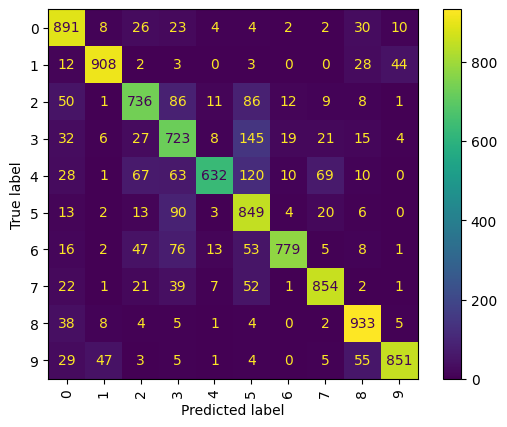

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Set the model to evaluation mode
device = "cpu"
model.to(device)
model.eval()

# Iterate through the test dataloader to make predictions and collect labels
for itr, (image, label) in enumerate(test_dataloader):
    if (torch.cuda.is_available()):
        image = image.to(device)
        label = label.to(device)

    pred = model(image)
    predicted = torch.argmax(pred, 1)

    true_labels.extend(label.cpu().numpy())
    predicted_labels.extend(predicted.cpu().numpy())

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.show()
